# FIT5149 S1 2020 Assessment 1
# Bushfire Analysis using Meteorological Data under the Theme of IT for Social Good

## Author: Haoheng Zhu
## StudentID: 30376467

Task Description:

The aim is to build statistical models
2
that can predict the burned area of the bushfires. Specifically, the problem you
are going to solve is: Can you
• accurately predict the burned area of a bushfire given the collected data?
• well explain your prediction and the associated findings? For example,
identify the key factors are strongly associated with the response variable,
i.e., the burned area.

In [1]:
require('psych')
require('corrplot') # for correlation plot
require('dplyr')
require('ggplot2')
require('lattice') # for levelplot
require("PerformanceAnalytics") # performance plot
require('leaps') # perform forward/backward stepwise selection
require('glmnet') # perform lasso regularisation
require('MASS') # LDA model
require('caret') # confusion matrix
require(e1071) # svm
require('class')

Loading required package: psych
Warning message:
"package 'psych' was built under R version 3.6.3"Loading required package: corrplot
Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: PerformanceAnalytics
Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Loading required

## Read 'forestfires.csv' file

In [2]:
forestfires <- read.csv('forestfires.csv')

#### The first 10 lines from the data is:

In [3]:
head(forestfires, 10)

X Y month day FFMC DMC   DC    ISI  temp RH wind rain area
1  7 5 mar   fri 86.2  26.2  94.3  5.1  8.2 51 6.7  0.0  0   
2  7 4 oct   tue 90.6  35.4 669.1  6.7 18.0 33 0.9  0.0  0   
3  7 4 oct   sat 90.6  43.7 686.9  6.7 14.6 33 1.3  0.0  0   
4  8 6 mar   fri 91.7  33.3  77.5  9.0  8.3 97 4.0  0.2  0   
5  8 6 mar   sun 89.3  51.3 102.2  9.6 11.4 99 1.8  0.0  0   
6  8 6 aug   sun 92.3  85.3 488.0 14.7 22.2 29 5.4  0.0  0   
7  8 6 aug   mon 92.3  88.9 495.6  8.5 24.1 27 3.1  0.0  0   
8  8 6 aug   mon 91.5 145.4 608.2 10.7  8.0 86 2.2  0.0  0   
9  8 6 sep   tue 91.0 129.5 692.6  7.0 13.1 63 5.4  0.0  0   
10 7 5 sep   sat 92.5  88.0 698.6  7.1 22.8 40 4.0  0.0  0

#### The structure of the dataset is:

In [4]:
str(forestfires)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [5]:
cat("The 'forestfires.csv' dataset has", dim(forestfires)[1], "records, with", dim(forestfires)[2],
 "attributes.")


The 'forestfires.csv' dataset has 517 records, with 13 attributes.

#### Statistical description of 'forestfires.csv' dataset

In [6]:
summary(forestfires)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

In [7]:
describe(forestfires)

vars n   mean         sd          median trimmed    mad        min 
X       1   517   4.66924565   2.3137778   4.00   4.672289   2.965200  1.0
Y       2   517   4.29980658   1.2299004   4.00   4.308434   1.482600  2.0
month*  3   517   6.75822050   4.3732754   7.00   6.720482   7.413000  1.0
day*    4   517   3.73694391   1.9250613   4.00   3.672289   2.965200  1.0
FFMC    5   517  90.64468085   5.5201108  91.60  91.454940   1.927380 18.7
DMC     6   517 110.87234043  64.0464822 108.30 106.522410  51.742740  1.1
DC      7   517 547.94003868 248.0661917 664.20 578.692289 118.904520  7.9
ISI     8   517   9.02166344   4.5594772   8.40   8.727470   3.113460  0.0
temp    9   517  18.88916828   5.8066253  19.30  19.091084   5.337360  2.2
RH     10   517  44.28820116  16.3174692  42.00  42.706024  14.826000 15.0
wind   11   517   4.01760155   1.7916526   4.00   3.898795   1.927380  0.4
rain   12   517   0.02166344   0.2959591   0.00   0.000000   0.000000  0.0
area   13   517  12.84729207  63.6558185   0.52   3.181952   0.770952  0.0
       max     range   skew        kurtosis    se         
X         9.00    8.00  0.03603577  -1.1796691  0.10175983
Y         9.00    7.00  0.41487792   1.3782826  0.05409096
month*   12.00   11.00  0.08358697  -1.7193189  0.19233643
day*      7.00    6.00  0.15684203  -1.1093028  0.08466410
FFMC     96.20   77.50 -6.53749886  66.1393621  0.24277420
DMC     291.30  290.20  0.54432492   0.1789299  2.81676107
DC      860.60  852.70 -1.09406780  -0.2650719 10.90993864
ISI      56.10   56.10  2.52162669  21.1458110  0.20052558
temp     33.30   31.10 -0.32925302   0.1111986  0.25537509
RH      100.00   85.00  0.85790328   0.4091470  0.71764148
wind      9.40    9.00  0.56769205   0.0304595  0.07879679
rain      6.40    6.40 19.70150380 415.5969287  0.01301627
area   1090.84 1090.84 12.77248266 191.5020312  2.79957970

In [8]:
colSums(is.na(forestfires))

X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    0     0     0     0     0     0     0     0     0     0     0     0     0

#### There is no NA value (missing value) in the dataset

### <font color='blue'>Details of the preprocessed dataset attributes.</font> Retrieved from (http://www3.dsi.uminho.pt/pcortez/fires.pdf)

Attribute Description

X: x-axis coordinate (from 1 to 9). Axis values where the fire occurred

Y: y-axis coordinate (from 1 to 9). Axis values where the fire occurred

month: Month of the year (January to December)

day: Day of the week (Monday to Sunday)

FFMC: Fine Fuel Moisture Code

DMC: Duff Moisture Code

DC: Drought Code

ISI: ISI index. The ISI is a score that correlates with fire velocity spread

temp: Outside temperature (in ◦C)

RH: Outside relative humidity (in %)

wind: Outside wind speed (in km/h)

rain: Outside rain (in mm/m2)

area: Total burned area (in ha)

## Explore the correlation between attributes

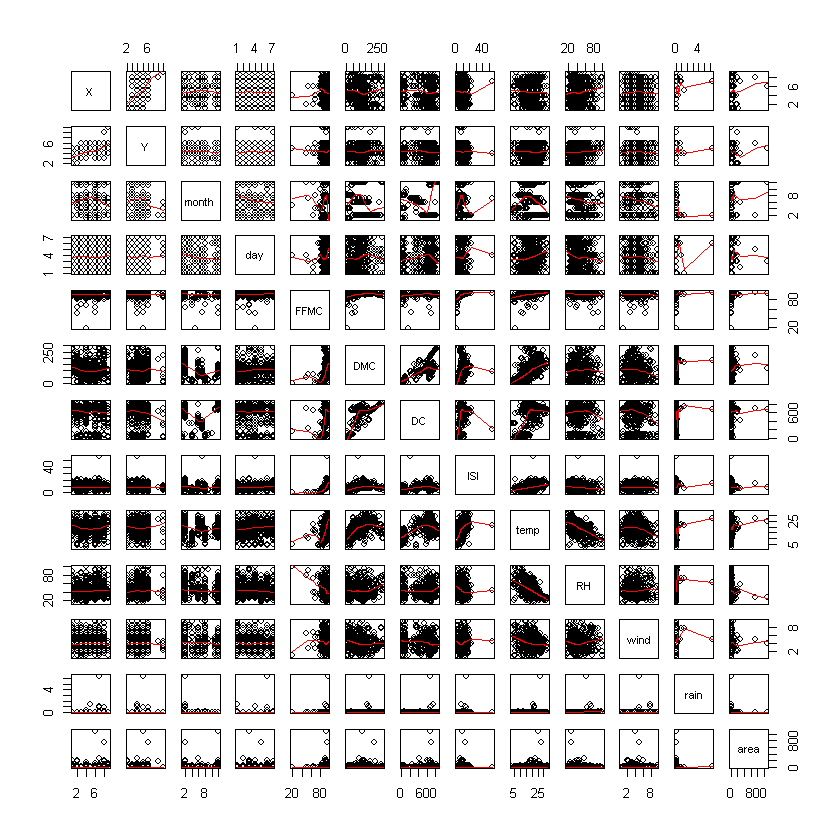

In [9]:
pairs(forestfires,panel = panel.smooth)

In [10]:
# show correlation against each variable except categorical variable 'Month' and 'Day'
cor(forestfires[-c(3,4)])

X            Y            FFMC        DMC          DC         
X     1.000000000  0.539548171 -0.02103927 -0.048384178 -0.08591612
Y     0.539548171  1.000000000 -0.04630755  0.007781561 -0.10117777
FFMC -0.021039272 -0.046307546  1.00000000  0.382618800  0.33051180
DMC  -0.048384178  0.007781561  0.38261880  1.000000000  0.68219161
DC   -0.085916123 -0.101177767  0.33051180  0.682191612  1.00000000
ISI   0.006209941 -0.024487992  0.53180493  0.305127835  0.22915417
temp -0.051258262 -0.024103084  0.43153226  0.469593844  0.49620805
RH    0.085223194  0.062220731 -0.30099542  0.073794941 -0.03919165
wind  0.018797818 -0.020340852 -0.02848481 -0.105342253 -0.20346569
rain  0.065387168  0.033234103  0.05670153  0.074789982  0.03586086
area  0.063385299  0.044873225  0.04012200  0.072994296  0.04938323
     ISI          temp        RH          wind        rain         area        
X     0.006209941 -0.05125826  0.08522319  0.01879782  0.065387168  0.063385299
Y    -0.024487992 -0.02410308  0.06222073 -0.02034085  0.033234103  0.044873225
FFMC  0.531804931  0.43153226 -0.30099542 -0.02848481  0.056701533  0.040122004
DMC   0.305127835  0.46959384  0.07379494 -0.10534225  0.074789982  0.072994296
DC    0.229154169  0.49620805 -0.03919165 -0.20346569  0.035860862  0.049383225
ISI   1.000000000  0.39428710 -0.13251718  0.10682589  0.067668190  0.008257688
temp  0.394287104  1.00000000 -0.52739034 -0.22711622  0.069490547  0.097844107
RH   -0.132517177 -0.52739034  1.00000000  0.06941007  0.099751223 -0.075518563
wind  0.106825888 -0.22711622  0.06941007  1.00000000  0.061118880  0.012317277
rain  0.067668190  0.06949055  0.09975122  0.06111888  1.000000000 -0.007365729
area  0.008257688  0.09784411 -0.07551856  0.01231728 -0.007365729  1.000000000

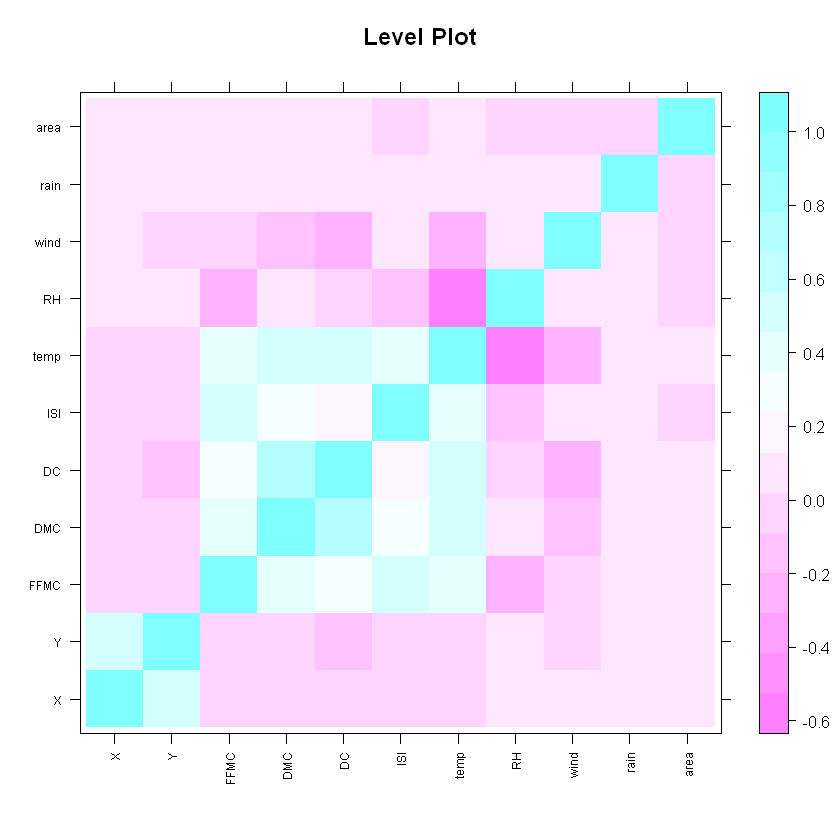

In [11]:
# show correlation among the numeric variables with level plot
levelplot(cor(forestfires[-c(3,4)]),scales = list(x=list(rot=90,cex=0.6),y=list(cex=0.6)), main="Level Plot",xlab="",ylab="")

From the level plot, some variables have significant correlation as the color is darker. It is helpful to identify these variables because they can help selecting features for machine learning.

The association highlighted against <font color='orange'>area</font> are: ISI, RH, wind, rain. But the actual coefficient value can't be identified. So let's plot more to visualize them.

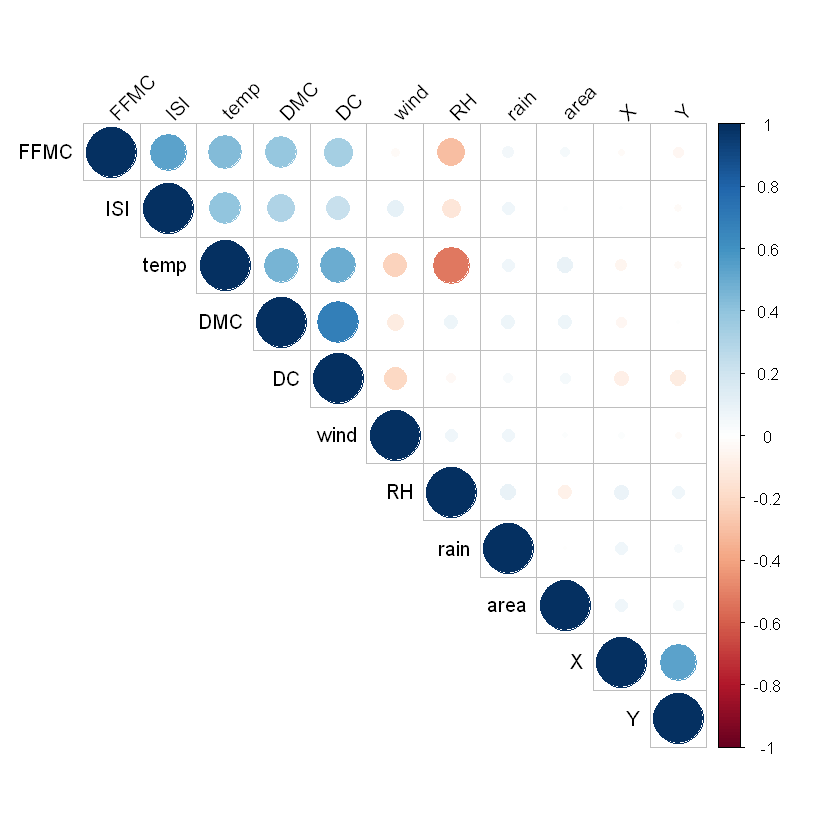

In [12]:
corrplot(cor(forestfires[-c(3,4)]), type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

#### Ploting the correlation matrix gives a more focused visulization for which variables are strongly correlated. From the corrplot, it looks like <font color='yellow'> 'temp' and 'rain' </font> are highly negatively correlated. <font color='blue'> 'DC' and 'temp' </font>are strongly positively correlated. Of course there are some other highly correlated variables too.

#### However, the coefficients for <font color='orange'>Area</font> are still not shown from this plot. So I'll perform more indepth EDA on the correlation coefiicients.

### This suggests that I can potentially remove some highly correlated predictor vairables in order to deal with <font color='red'>Multicollinearity</font>

#### Show the correlation coefficient and p-value

In [13]:
source("http://www.sthda.com/upload/rquery_cormat.r")

In [14]:
rquery.cormat(forestfires[-c(3,4)], type="flatten", graph=FALSE)

$r
    row column     cor       p
1  FFMC    ISI  0.5300 4.4e-39
2  FFMC   temp  0.4300 7.3e-25
3   ISI   temp  0.3900 1.1e-20
4  FFMC    DMC  0.3800 1.8e-19
5   ISI    DMC  0.3100 1.3e-12
6  temp    DMC  0.4700 1.0e-29
7  FFMC     DC  0.3300 1.2e-14
8   ISI     DC  0.2300 1.4e-07
9  temp     DC  0.5000 1.7e-33
10  DMC     DC  0.6800 4.8e-72
11 FFMC   wind -0.0280 5.2e-01
12  ISI   wind  0.1100 1.5e-02
13 temp   wind -0.2300 1.8e-07
14  DMC   wind -0.1100 1.7e-02
15   DC   wind -0.2000 3.1e-06
16 FFMC     RH -0.3000 2.7e-12
17  ISI     RH -0.1300 2.5e-03
18 temp     RH -0.5300 2.4e-38
19  DMC     RH  0.0740 9.4e-02
20   DC     RH -0.0390 3.7e-01
21 wind     RH  0.0690 1.1e-01
22 FFMC   rain  0.0570 2.0e-01
23  ISI   rain  0.0680 1.2e-01
24 temp   rain  0.0690 1.1e-01
25  DMC   rain  0.0750 8.9e-02
26   DC   rain  0.0360 4.2e-01
27 wind   rain  0.0610 1.7e-01
28   RH   rain  0.1000 2.3e-02
29 FFMC   area  0.0400 3.6e-01
30  ISI   area  0.0083 8.5e-01
31 temp   area  0.0980 2.6e-02
32  DMC   area  0.0730 9.7e-02
33   DC   area  0.0490 2.6e-01
34 wind   area  0.0120 7.8e-01
35   RH   area -0.0760 8.6e-02
36 rain   area -0.0074 8.7e-01
37 FFMC      X -0.0210 6.3e-01
38  ISI      X  0.0062 8.9e-01
39 temp      X -0.0510 2.4e-01
40  DMC      X -0.0480 2.7e-01
41   DC      X -0.0860 5.1e-02
42 wind      X  0.0190 6.7e-01
43   RH      X  0.0850 5.3e-02
44 rain      X  0.0650 1.4e-01
45 area      X  0.0630 1.5e-01
46 FFMC      Y -0.0460 2.9e-01
47  ISI      Y -0.0240 5.8e-01
48 temp      Y -0.0240 5.8e-01
49  DMC      Y  0.0078 8.6e-01
50   DC      Y -0.1000 2.1e-02
51 wind      Y -0.0200 6.4e-01
52   RH      Y  0.0620 1.6e-01
53 rain      Y  0.0330 4.5e-01
54 area      Y  0.0450 3.1e-01
55    X      Y  0.5400 2.2e-40

$p
NULL

$sym
NULL

As shown, there are quite a few of high correlation coefficients in the matrix. I'll visulize the coefficients and p-values in the following plot.

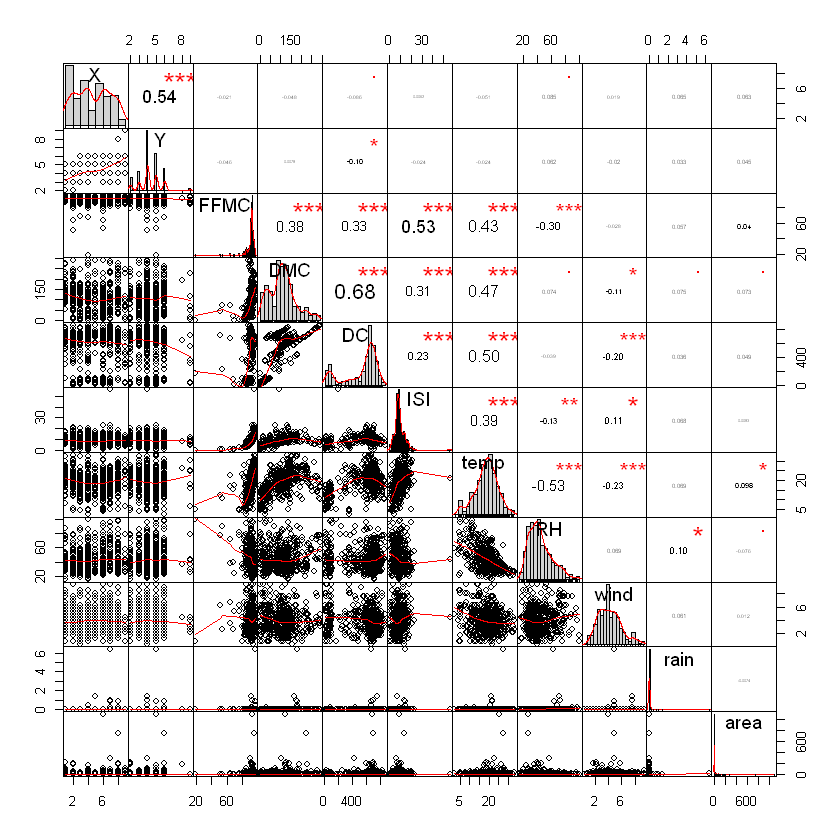

In [15]:
chart.Correlation(forestfires[-c(3,4)], histogram=TRUE, pch=25)

#### From this chart, <font color='orange'>Area</font> is not significantly correlated with many attributes but somewhat correlated with <font color='blue'>Temp, RH, DMC</font>

#### Next I perform EDA with categorical data 'Month' and 'Day'. I do this to investigate the affects on correlation among all numeric predictor variables.

#### Explore the affect of <font color='blue'>day</font> on other numeric predictor variables

#### It would be meaningless to boxplot day against X and Y so I skip these two variables and start from temp

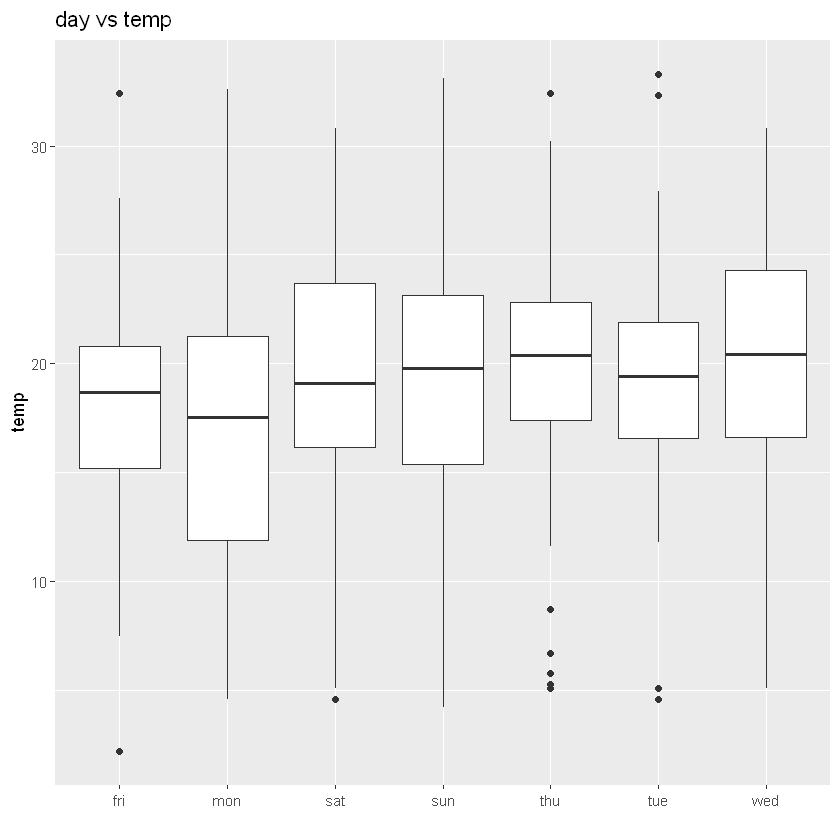

In [16]:
ggplot(forestfires, aes(day, temp)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "temp", title ="day vs temp")

#### The median of all 7 days are very similar. So, I believe that day doesn't play a big role on affecting the temp.

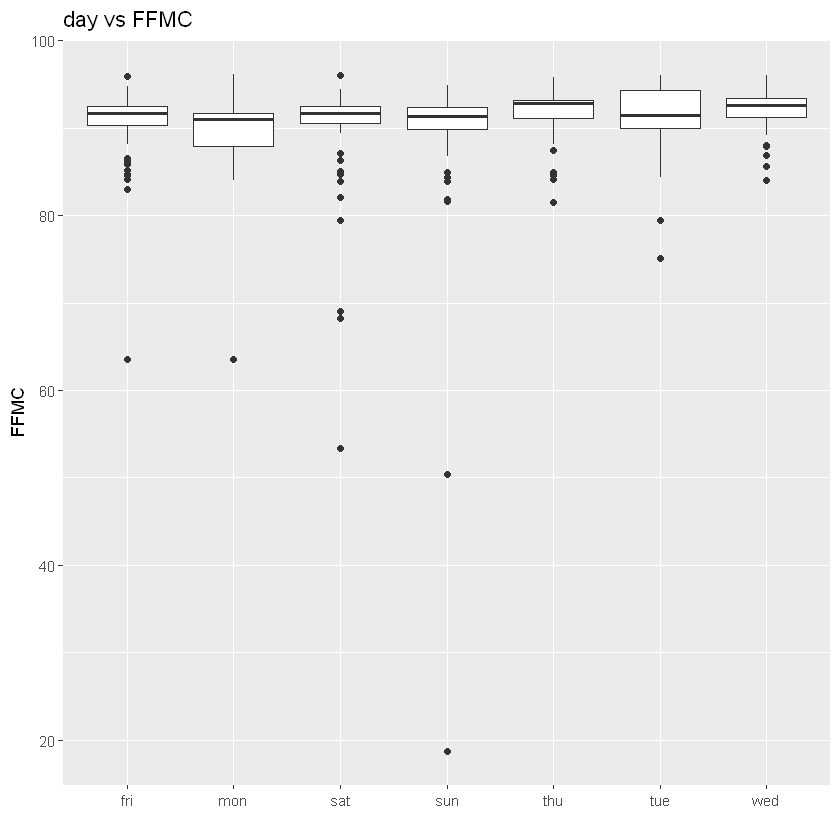

In [17]:
ggplot(forestfires, aes(day, FFMC)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "FFMC", title ="day vs FFMC")

#### The median of all 7 days are very similar, the distribution are similar. So, I believe that day doesn't play a big role on affecting the FFMC.

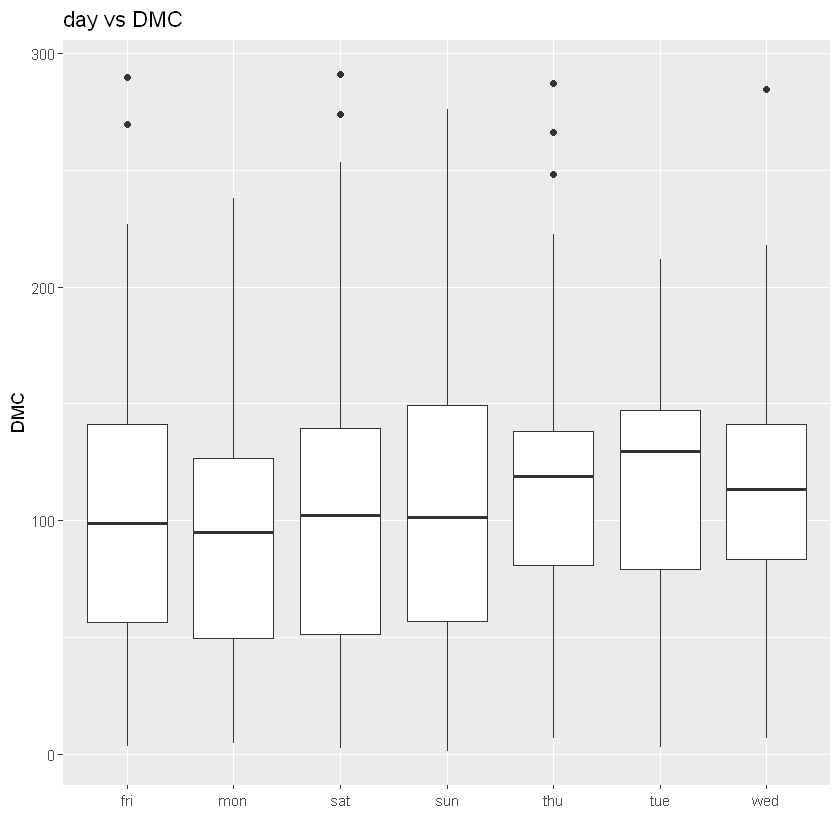

In [18]:
ggplot(forestfires, aes(day, DMC)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "DMC", title ="day vs DMC")

#### Nothing particular either

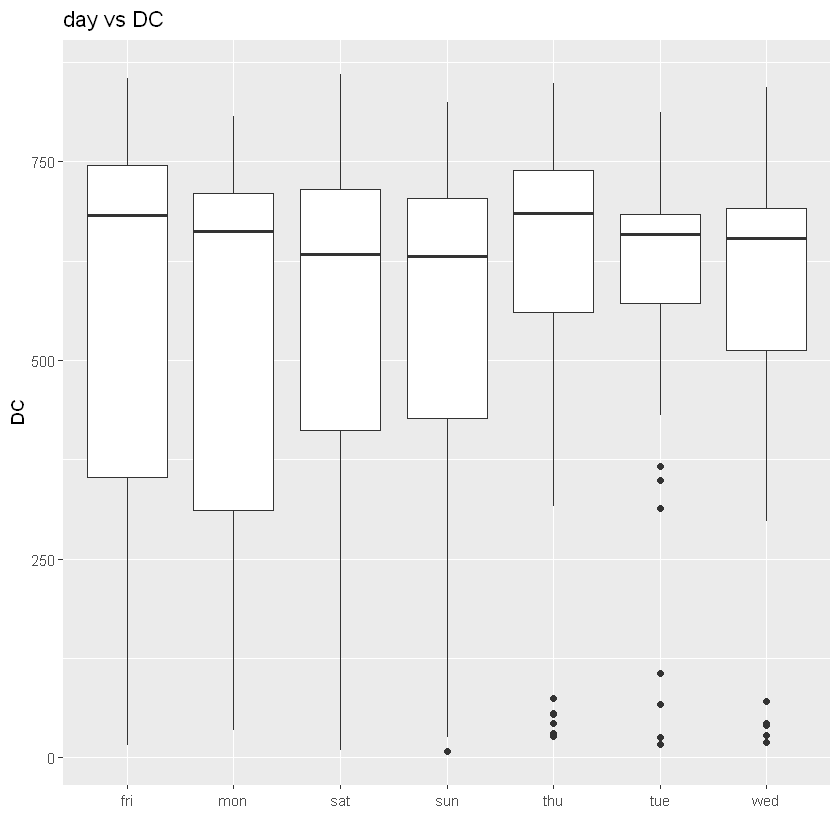

In [19]:
ggplot(forestfires, aes(day, DC)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "DC", title ="day vs DC")

#### No clear correlation between day and DC

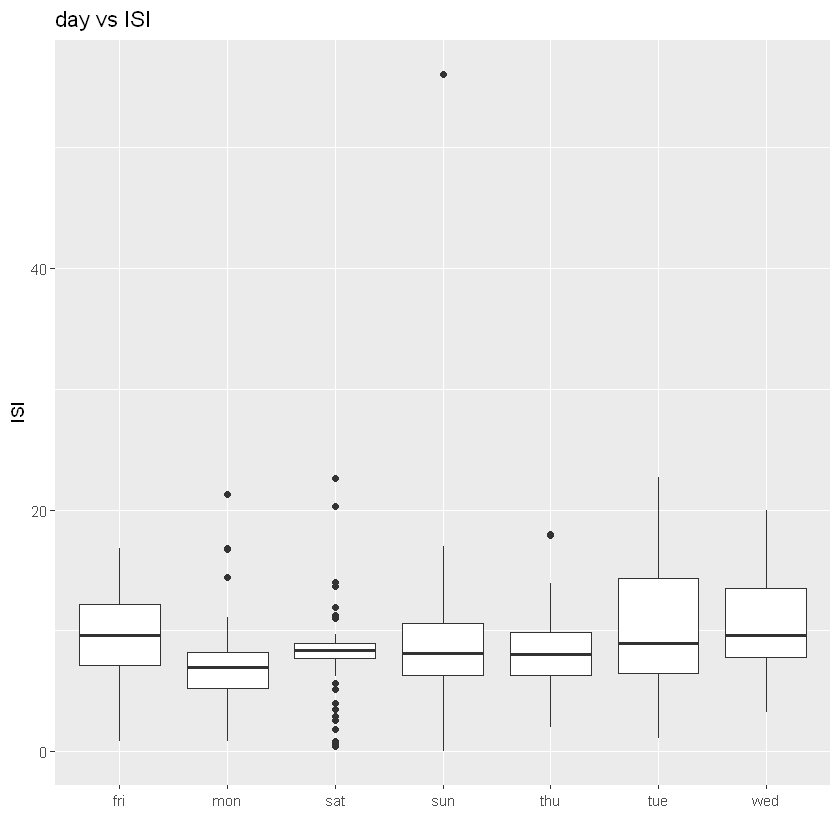

In [20]:
ggplot(forestfires, aes(day, ISI)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "ISI", title ="day vs ISI")

#### Can't identify correlation between day and ISI either

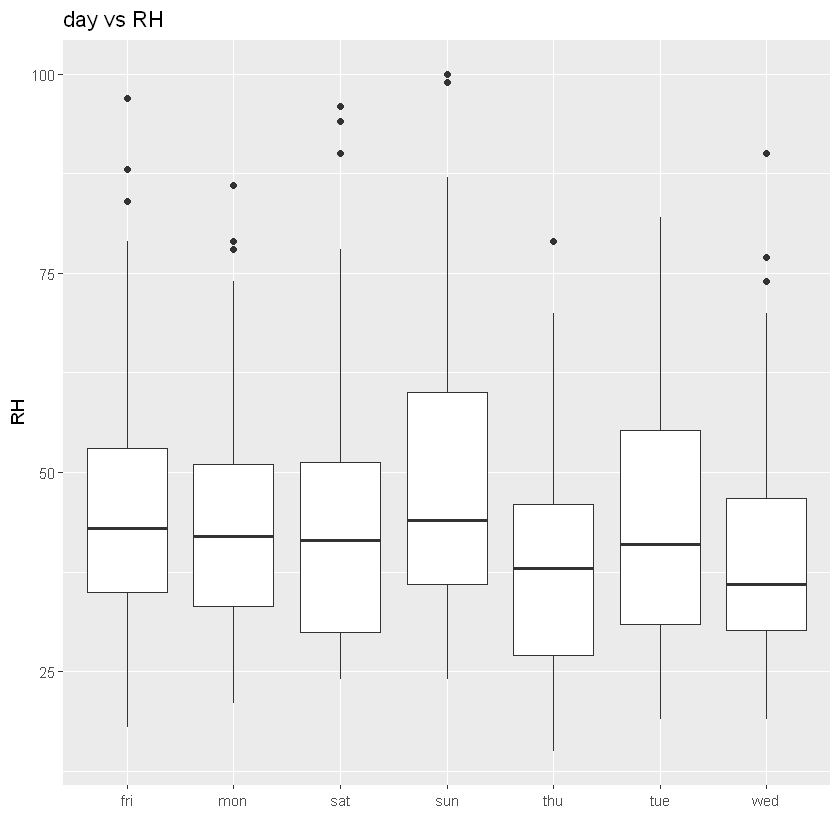

In [21]:
ggplot(forestfires, aes(day, RH)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "RH", title ="day vs RH")

#### day doesn't affect RH either

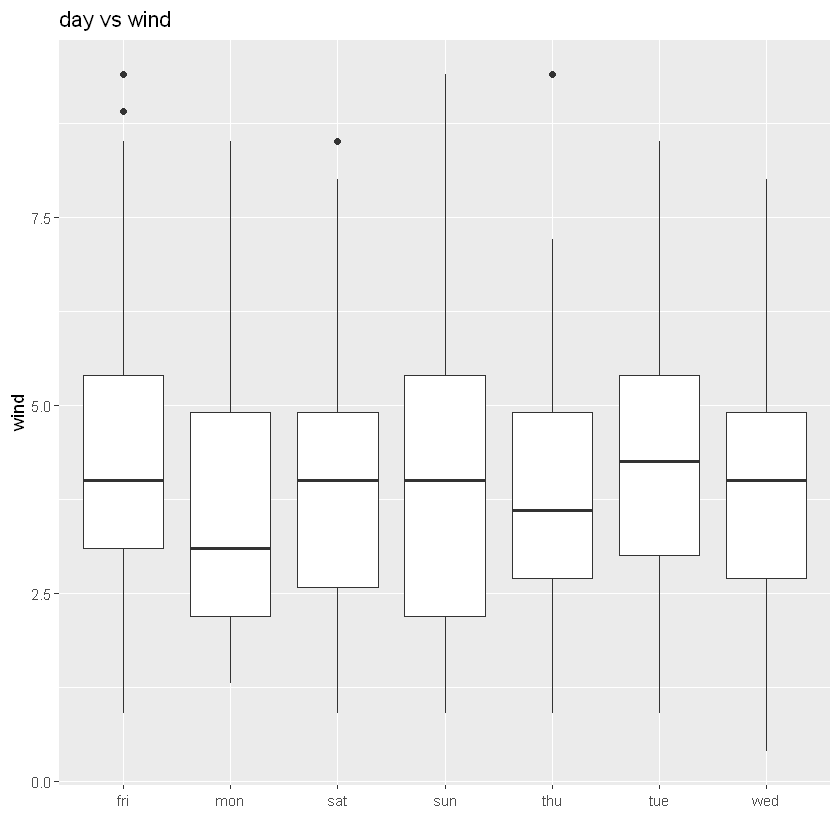

In [22]:
ggplot(forestfires, aes(day, wind)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "wind", title ="day vs wind")

#### day has nothing to do with wind

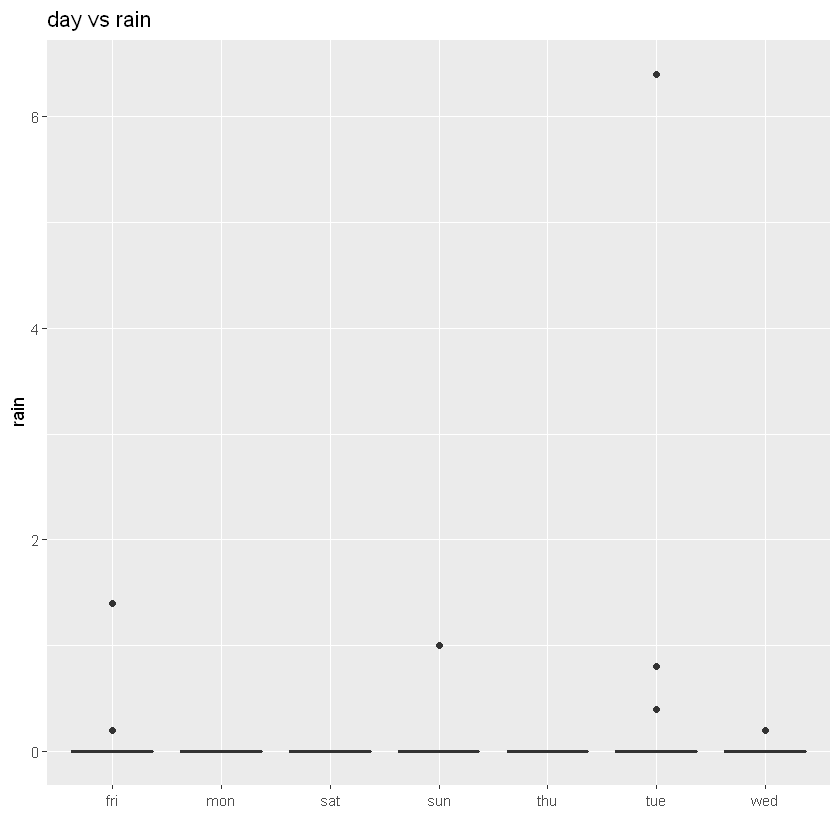

In [23]:
ggplot(forestfires, aes(day, rain)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "rain", title ="day vs rain")

#### rain data is too little to draw conclusion but intuitively, day shouldn't affect rain anyway.

#### By intuition, 'month' would have something to do with 'temp' because of seasons. So I'll start with boxplot 'month' against 'temp'

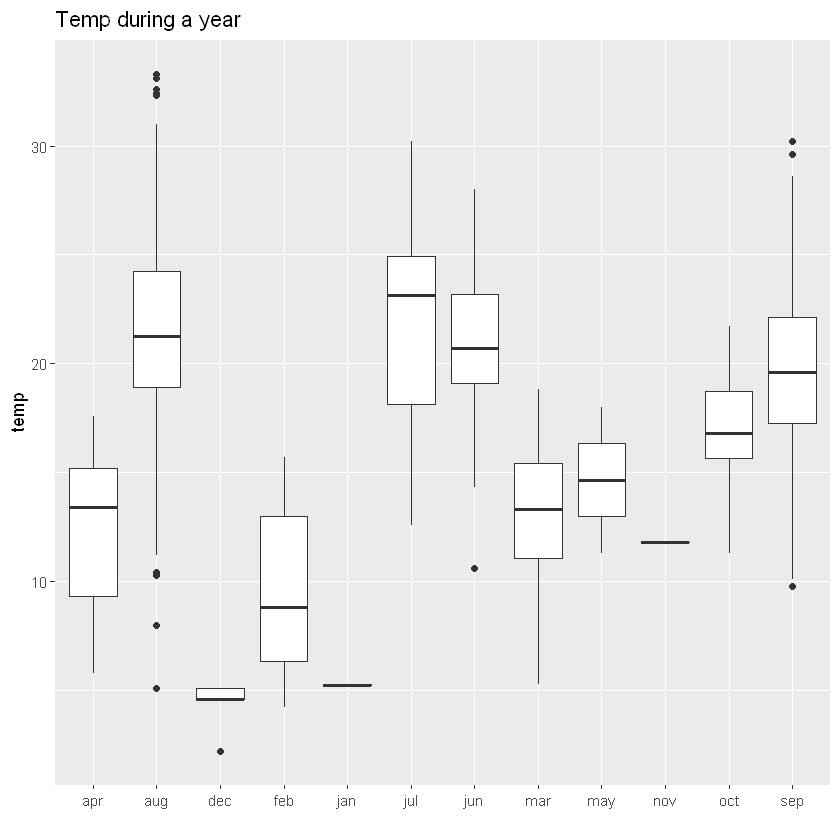

In [24]:
ggplot(forestfires, aes(month, temp)) %>%
+ geom_boxplot() %>%
+ labs(x = '', y = "temp", title ="Temp during a year")

#### There is a clear trend that <font color='orange'>'jun','jul','aug', 'sep'</font> have larger temp than others. So, the season could play a role on affecting the temp.

#### It is necessary to <font color='red'>remove</font> month variable because of <font color='red'>Multilinearity</font>. Month becomes redundant.

In [25]:
new_forest <- forestfires[-3]

In [26]:
str(new_forest)

'data.frame':	517 obs. of  12 variables:
 $ X   : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y   : int  5 4 4 6 6 6 6 6 6 5 ...
 $ day : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC: num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC  : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp: num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH  : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind: num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain: num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area: num  0 0 0 0 0 0 0 0 0 0 ...


In [27]:
summary(new_forest)

       X               Y        day          FFMC            DMC       
 Min.   :1.000   Min.   :2.0   fri:85   Min.   :18.70   Min.   :  1.1  
 1st Qu.:3.000   1st Qu.:4.0   mon:74   1st Qu.:90.20   1st Qu.: 68.6  
 Median :4.000   Median :4.0   sat:84   Median :91.60   Median :108.3  
 Mean   :4.669   Mean   :4.3   sun:95   Mean   :90.64   Mean   :110.9  
 3rd Qu.:7.000   3rd Qu.:5.0   thu:61   3rd Qu.:92.90   3rd Qu.:142.4  
 Max.   :9.000   Max.   :9.0   tue:64   Max.   :96.20   Max.   :291.3  
                               wed:54                                  
       DC             ISI              temp             RH        
 Min.   :  7.9   Min.   : 0.000   Min.   : 2.20   Min.   : 15.00  
 1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50   1st Qu.: 33.00  
 Median :664.2   Median : 8.400   Median :19.30   Median : 42.00  
 Mean   :547.9   Mean   : 9.022   Mean   :18.89   Mean   : 44.29  
 3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80   3rd Qu.: 53.00  
 Max.   :860.6   Max. 

## Model Development

#### <font color='blue'>Forward Selection</font> with regsubsets() from Leaps package

In [28]:
#new_forest$day <- NULL

regfit.fwd <- regsubsets(new_forest$area~.,data=new_forest,nvmax=11,method='forward')
reg.summary.fwd <- summary(regfit.fwd)
reg.summary.fwd

Subset selection object
Call: regsubsets.formula(new_forest$area ~ ., data = new_forest, nvmax = 11, 
    method = "forward")
16 Variables  (and intercept)
       Forced in Forced out
X          FALSE      FALSE
Y          FALSE      FALSE
daymon     FALSE      FALSE
daysat     FALSE      FALSE
daysun     FALSE      FALSE
daythu     FALSE      FALSE
daytue     FALSE      FALSE
daywed     FALSE      FALSE
FFMC       FALSE      FALSE
DMC        FALSE      FALSE
DC         FALSE      FALSE
ISI        FALSE      FALSE
temp       FALSE      FALSE
RH         FALSE      FALSE
wind       FALSE      FALSE
rain       FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: forward
          X   Y   daymon daysat daysun daythu daytue daywed FFMC DMC DC  ISI
1  ( 1 )  " " " " " "    " "    " "    " "    " "    " "    " "  " " " " " "
2  ( 1 )  " " " " " "    "*"    " "    " "    " "    " "    " "  " " " " " "
3  ( 1 )  "*" " " " "    "*"    " "    " "    " "    " "    " "  " " " " " "

#### $C_p$,  BIC, Adjusted $R^2$, RSS plot

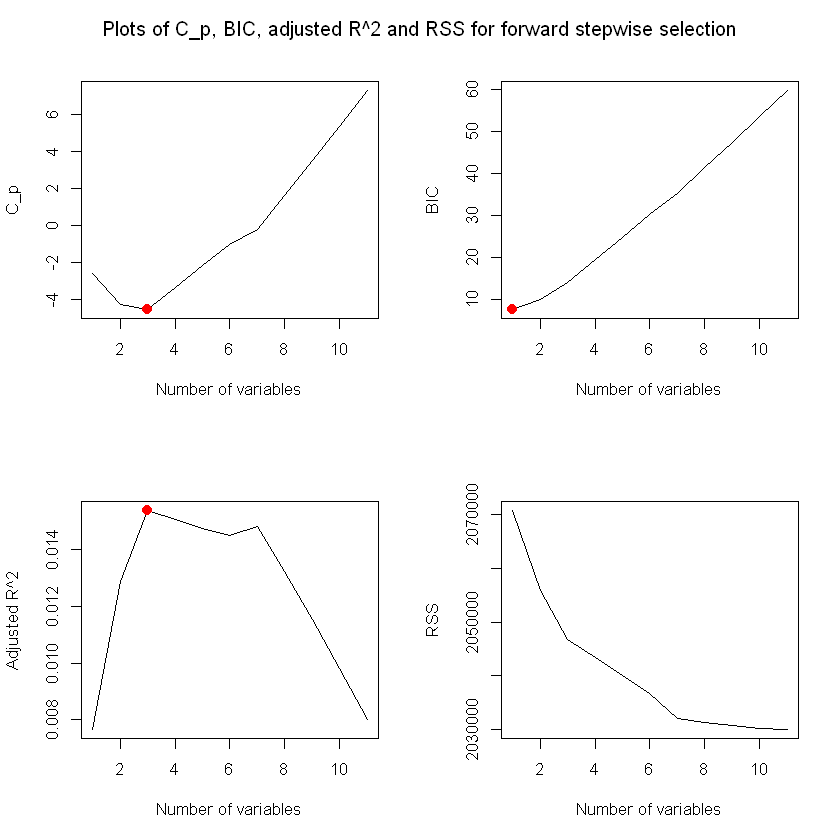

In [29]:
par(mfrow = c(2, 2))
# cp plot
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
fwd.mincp <- min(reg.summary.fwd$cp)

# BIC plot
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
fwd.minbic <- min(reg.summary.fwd$bic)

# Adjusted R square plot
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
fwd.maxrsquare <- max(reg.summary.fwd$adjr2)

# RSS plot
plot(reg.summary.fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

In [30]:
coeffs <- coef(regfit.fwd, id = 3)
names(coeffs)

[1] "(Intercept)" "X"           "daysat"      "temp"

#### From adjusted R square, forward stepwise selection suggests that 3 variables would optimize the performance of a linear model without adding too many features. The three features forward stepwise selected are <font color='red'>'X', 'day', 'temp'</font>

#### <font color='blue'>Backward Selection</font>

In [31]:
regfit.bwd <- regsubsets(new_forest$area~.,data=new_forest,nvmax=11,method='backward')
reg.summary.bwd <- summary(regfit.bwd)
reg.summary.bwd

Subset selection object
Call: regsubsets.formula(new_forest$area ~ ., data = new_forest, nvmax = 11, 
    method = "backward")
16 Variables  (and intercept)
       Forced in Forced out
X          FALSE      FALSE
Y          FALSE      FALSE
daymon     FALSE      FALSE
daysat     FALSE      FALSE
daysun     FALSE      FALSE
daythu     FALSE      FALSE
daytue     FALSE      FALSE
daywed     FALSE      FALSE
FFMC       FALSE      FALSE
DMC        FALSE      FALSE
DC         FALSE      FALSE
ISI        FALSE      FALSE
temp       FALSE      FALSE
RH         FALSE      FALSE
wind       FALSE      FALSE
rain       FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: backward
          X   Y   daymon daysat daysun daythu daytue daywed FFMC DMC DC  ISI
1  ( 1 )  " " " " " "    "*"    " "    " "    " "    " "    " "  " " " " " "
2  ( 1 )  " " " " " "    "*"    " "    " "    " "    " "    " "  " " " " " "
3  ( 1 )  " " " " " "    "*"    " "    " "    " "    " "    " "  "*" " " "

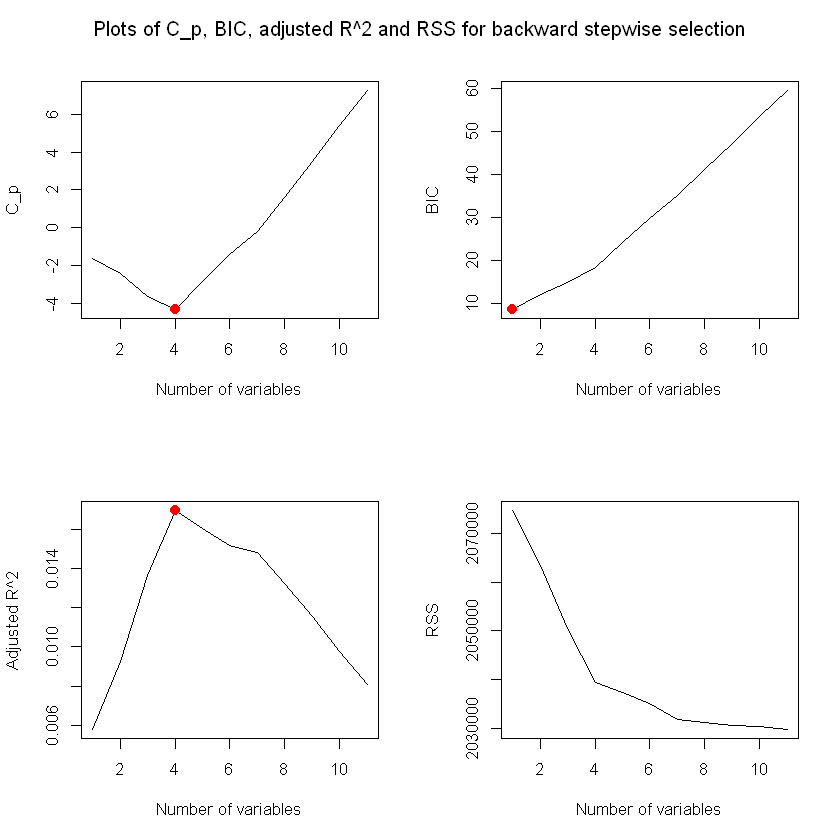

In [32]:
par(mfrow = c(2, 2))
# cp plot
plot(reg.summary.bwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.bwd$cp), reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)], col = "red", cex = 2, pch = 20)
bwd.mincp <- min(reg.summary.bwd$cp)

# BIC plot
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.bwd$bic), reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)], col = "red", cex = 2, pch = 20)
bwd.minbic <- min(reg.summary.bwd$bic)

# Adjusted R square plot
plot(reg.summary.bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.bwd$adjr2), reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)], col = "red", cex = 2, pch = 20)
bwd.maxrsquare <- max(reg.summary.bwd$adjr2)

# RSS plot
plot(reg.summary.bwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

In [33]:
coeffs <- coef(regfit.bwd, id = 4)
names(coeffs)

[1] "(Intercept)" "X"           "daysat"      "DMC"         "RH"

#### Backward selection suggests to choose 4 variables and they are<font color='red'> 'X', 'day', 'DMC', 'RH'</font>

## Perform Lasso Regularisation

#### Lasso regularisation chooses features automatically by using <font color='orange'>shrinkage parameter</font> to shrink the  estimated coefficient towards 0. If a feature's estimated coefficient can be shrunk to 0, that feature can be eliminated.

In [34]:
xmat <- model.matrix(new_forest$area~.,data=new_forest)

Remove the dummy variable generated by model.matrix

In [35]:
xmat <- xmat[, -1]

In [36]:
train_rows <- sample(1:dim(new_forest)[1], .66*dim(new_forest)[1])
x.train <- xmat[train_rows, ]
x.test <- xmat[-train_rows, ]

y.train <- new_forest$area[train_rows]
y.test <- new_forest$area[-train_rows]

### 'type.measure' should be one of "mse", "deviance", "class", "auc", "mae"

In [37]:
set.seed(1234)
cv.lasso <- cv.glmnet(x.train, y.train, type.measure="mse", family='gaussian', alpha = 1)
bestlam <- cv.lasso$lambda.min

In [38]:
bestlam

[1] 7.859132

Warning message in plot.window(...):
""xvar" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""xvar" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""xvar" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""xvar" is not a graphical parameter"Warning message in box(...):
""xvar" is not a graphical parameter"Warning message in title(...):
""xvar" is not a graphical parameter"

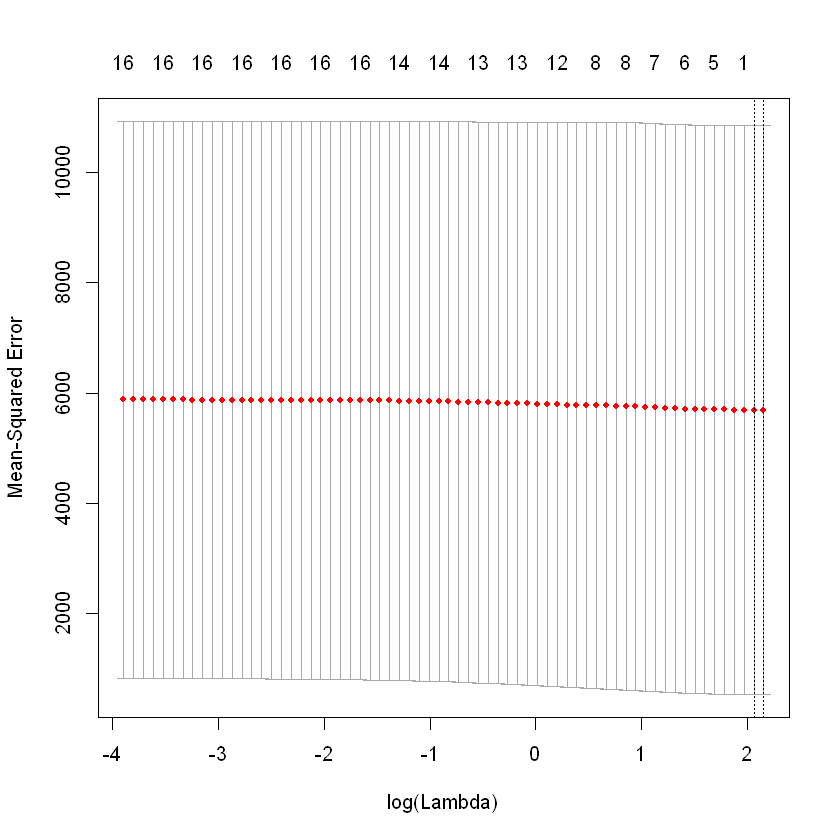

In [39]:
plot(cv.lasso, xvar = "lambda")

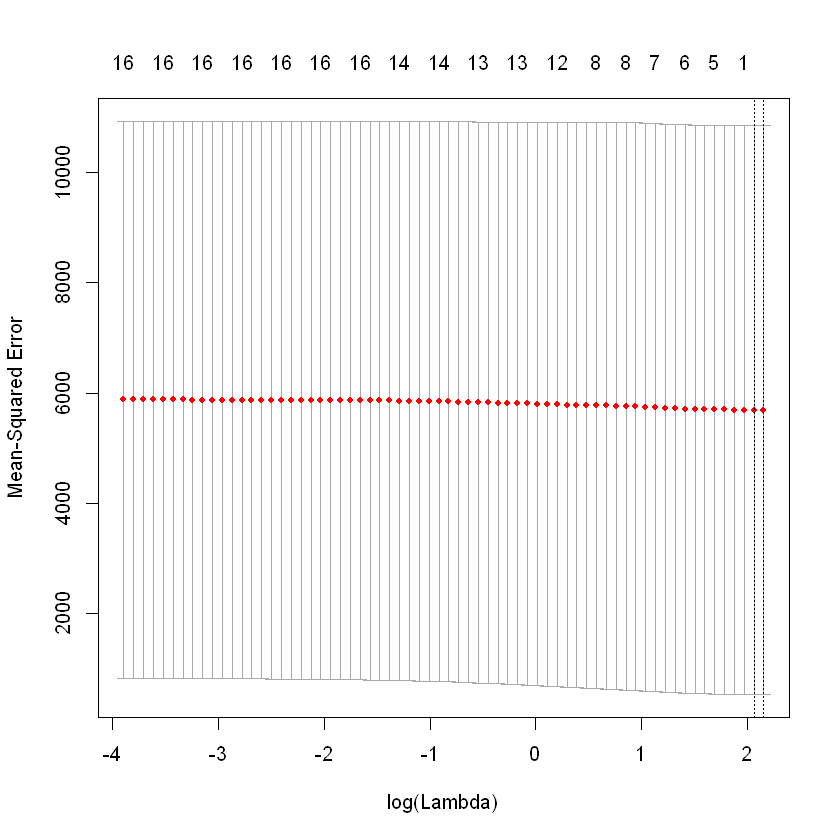

In [40]:
plot(cv.lasso)

In [41]:
predict(cv.lasso, s = bestlam, type = "coefficients")

17 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 11.8127157
X            .        
Y            .        
daymon       .        
daysat       .        
daysun       .        
daythu       .        
daytue       .        
daywed       .        
FFMC         .        
DMC          .        
DC           .        
ISI          .        
temp         0.1312272
RH           .        
wind         .        
rain         .        

#### Lasso algorithm choses none as the best predictor. This indicates that all predictors have abysmal correlation with the response.

#### Perform Ridge

In [42]:
set.seed(123)
cv.ridge <- cv.glmnet(x.train, y.train, type.measure="mse", family='gaussian', alpha = 0)
bestlam_ridge <- cv.ridge$lambda.min

In [43]:
bestlam_ridge

[1] 208.7454

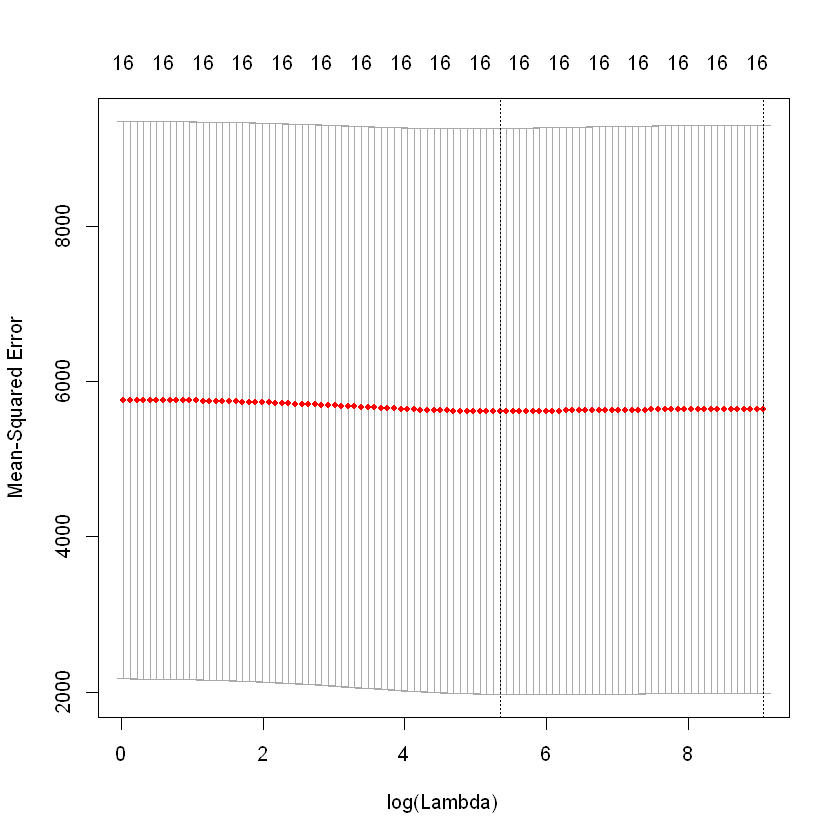

In [44]:
plot(cv.ridge)

In [45]:
predict(cv.ridge, s = bestlam_ridge, type = "coefficients")

17 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) -5.827794367
X            0.679754842
Y            1.123791919
daymon      -1.628351036
daysat       4.434063914
daysun      -1.098733010
daythu       2.650625518
daytue       0.904222957
daywed      -0.585337076
FFMC         0.053853214
DMC          0.025466544
DC           0.003914793
ISI         -0.029355023
temp         0.299224851
RH          -0.113567743
wind         0.323524598
rain        -0.764918012

#### Ridge choses all predictors and this corresponds with Lasso that it is very hard to determine the most significant predictor for this dataset.

### Partition data to train and test datasets

In [46]:
inTrain <- createDataPartition(y = new_forest$area, p = 0.80, list = FALSE)
train <- new_forest[inTrain,]
test <- new_forest[-inTrain,]

In [47]:
dim(train)

[1] 416  12

In [48]:
dim(test)

[1] 101  12

## Linear Regression Model with Forward selection chosen predictors: <font color='red'>'X', 'day', 'temp'</font>

In [49]:
fit.lm1 <- lm(area~X+day+temp,data=train )

In [50]:
summary(fit.lm1)


Call:
lm(formula = area ~ X + day + temp, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
 -45.95  -16.71   -7.10    0.99 1051.47 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -28.9203    14.9916  -1.929   0.0544 .
X             2.5580     1.4625   1.749   0.0810 .
daymon        7.1370    12.2873   0.581   0.5617  
daysat       20.5487    11.8909   1.728   0.0847 .
daysun        0.8576    11.2379   0.076   0.9392  
daythu       11.0397    12.6889   0.870   0.3848  
daytue        1.6732    12.8279   0.130   0.8963  
daywed        0.7685    13.2833   0.058   0.9539  
temp          1.2905     0.5810   2.221   0.0269 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.47 on 407 degrees of freedom
Multiple R-squared:  0.0316,	Adjusted R-squared:  0.01257 
F-statistic:  1.66 on 8 and 407 DF,  p-value: 0.1063


In [51]:
anova(fit.lm1, test = "Chisq")

Df  Sum Sq     Mean Sq   F value   Pr(>F)    
X           1   15146.23 15146.231 3.2311102 0.07299280
day         6   23987.05  3997.841 0.8528502 0.52976883
temp        1   23129.41 23129.410 4.9341430 0.02688068
Residuals 407 1907863.17  4687.624        NA         NA

#### From the table, can conclude that <font color="orange">temp</font> are statistically significant, if $\alpha = 0.05$. But low R-squared value 0.0316 (below 0.5) indicates that this model isn't a good fit.

In [52]:
predict(fit.lm1, test)

1           2           9          13          14          15 
 -0.4321808  13.8881145  10.1225733   8.3663714  21.0526355  21.2657586 
         18          27          35          42          44          52 
 20.2322346  13.5053883  20.9235839  25.6057875  27.1544063   9.9153430 
         65          68          76          77          79          89 
 13.1436213   1.4897698  13.7876922  14.3626578  -7.3917426   7.1453457 
         90          91          93          95          98          99 
 29.4312430  25.9468507  19.2439243  28.8786895  21.7572862  -5.4187477 
        102         104         109         113         124         131 
 -0.9896842  27.8457556  28.0577673   9.0350277   3.5271206  21.7342405 
        135         136         138         140         141         157 
 -0.3444264  22.0153894   6.0227394   3.3151089  11.5950025  33.6530761 
        158         163         167         168         171         172 
  0.7096909  26.5921085   8.6187050  17.3942116  12.9004525  14.7670888 
        175         184         186         195         199         205 
 12.5116649  17.8033006   0.5819803   9.6155899  -1.6349421  23.9050714 
        213         217         219         220         236         238 
 14.9249556   3.9789709   7.1161777  13.1804899  17.6953055  -0.4273865 
        244         246         251         260         262         270 
 18.1055060  14.1970904  26.8979360  40.1194773  -6.7925762   7.6337250 
        274         278         295         296         297         302 
-11.6362686  -8.1729329  15.2846360  18.4926607   5.7396013  18.2135010 
        309         319         324         325         333         337 
 -2.2984644  25.3424188   6.4409758  15.1473451  23.9281171  21.0295897 
        339         344         352         354         359         369 
 27.9753286  19.1998221   1.1855752  14.5378009  11.8507637  28.6569336 
        378         381         382         388         404         406 
 25.0066211   9.5451118  23.4896054   9.8792766  30.0712353  13.8742916 
        409         412         429         439         442         458 
  6.9928957  -0.4321808  18.4888629  27.2004978  31.5887724   0.0874788 
        462         467         470         481         482         489 
 36.4829877   6.7279116   4.9652920  44.1148103  31.3248824   8.0208797 
        493         496         498         508         511 
 15.4503847  24.4079762  22.1105461   9.6200185   9.9149902

In [53]:
test$area

[1]   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
 [11]   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
 [21]   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
 [31]   0.00   0.00   0.00   0.43   0.47   1.61   1.63   1.94   2.29   2.51
 [41]   2.57   2.69   3.50   6.83   7.04  10.01  11.24  13.99  26.13  29.48
 [51]  31.72  31.86 196.48 212.88   0.00   0.76   0.68   1.38   3.30   4.40
 [61]   8.98  10.73   6.57   0.00   0.90   3.52   0.00   0.00   2.18   4.42
 [71]  11.22   0.00   7.48   2.18   7.31   1.72   0.00  12.64 174.63   7.73
 [81]  16.33   0.00   0.00   0.00   7.80   4.62   0.00   6.43   1.23  82.75
 [91]   0.00   3.18  61.13   2.75   0.00  46.70   0.00   0.00  14.68   0.00
[101]   0.43

In [54]:
lm1.prediction <- as.numeric(as.character(predict(fit.lm1, test)))

In [55]:
true.lm1 <- 0
false.lm1 <- 0
for (i in 1:length(test$area)){
    if (lm1.prediction[i] == test$area[i]){
        true.lm1 <- true.lm1+1
    } else {
        false.lm1 <- false.lm1+1
    }
}
cat('True prediction is:', true.lm1, 'and False prediction is: ', false.lm1)

True prediction is: 0 and False prediction is:  101

In [56]:
cat('Acuracy of Linear model 1 is: ',true.lm1/(true.lm1+false.lm1))

Acuracy of Linear model 1 is:  0

#### By comparing the prediction and the actual burned area, I can conclude that linear model 1 isn't an accurate model but the prediction are in similar range.

#### Second Linear Regression model uses backward stepwise selected features: <font color='red'>'X', 'day', 'DMC', 'RH'</font>

In [57]:
fit.lm2 <- lm(area~X+day+DMC+RH,data=train )
summary(fit.lm2)


Call:
lm(formula = area ~ X + day + DMC + RH, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
 -48.25  -16.33   -6.95    1.45 1051.57 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.41777   14.60367   0.166   0.8686  
X            2.71106    1.46989   1.844   0.0659 .
daymon       6.57965   12.29878   0.535   0.5930  
daysat      21.34582   11.88690   1.796   0.0733 .
daysun       3.19931   11.25102   0.284   0.7763  
daythu       8.94513   12.81809   0.698   0.4857  
daytue       2.46653   12.83078   0.192   0.8477  
daywed       1.71837   13.27244   0.129   0.8971  
DMC          0.07754    0.05212   1.488   0.1376  
RH          -0.37595    0.20786  -1.809   0.0712 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.55 on 406 degrees of freedom
Multiple R-squared:  0.03176,	Adjusted R-squared:  0.01029 
F-statistic:  1.48 on 9 and 406 DF,  p-value: 0.1531


In [58]:
anova(fit.lm2, test = "Chisq")

Df  Sum Sq      Mean Sq   F value   Pr(>F)    
X           1   15146.231 15146.231 3.2236858 0.07332356
day         6   23987.048  3997.841 0.8508905 0.53125145
DMC         1    8064.078  8064.078 1.7163380 0.19090584
RH          1   15369.803 15369.803 3.2712702 0.07124267
Residuals 406 1907558.699  4698.420        NA         NA

#### From the table, can conclude that <font color="orange">none of the chosen vairable</font> are statistically significant, if $\alpha = 0.05$. Although linear regression model 2(backward selection) R-squared is slightly higher than linear regression model 1(forward selection), its adjusted r square value is lower than model 1. This indicate that Linear model 1 is slightly better than model 2.

#### Step() to choose predictors

In [59]:
fit.lm <- lm(area~.,data=train )
step.lm <- step(fit.lm)
summary(step.lm)

Start:  AIC=3537.7
area ~ X + Y + day + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain

       Df Sum of Sq     RSS    AIC
- day   6   21448.5 1913273 3530.4
- DC    1      38.5 1891863 3535.7
- FFMC  1     293.3 1892118 3535.8
- rain  1     380.4 1892205 3535.8
- DMC   1    1420.9 1893245 3536.0
- RH    1    1937.2 1893762 3536.1
- Y     1    2570.8 1894395 3536.3
- ISI   1    2854.8 1894679 3536.3
- wind  1    6313.0 1898137 3537.1
- X     1    6910.4 1898735 3537.2
- temp  1    7599.0 1899423 3537.4
<none>              1891824 3537.7

Step:  AIC=3530.39
area ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain

       Df Sum of Sq     RSS    AIC
- DC    1       3.6 1913276 3528.4
- FFMC  1     176.2 1913449 3528.4
- rain  1     586.0 1913859 3528.5
- Y     1    1750.6 1915024 3528.8
- DMC   1    2283.5 1915556 3528.9
- RH    1    3186.6 1916460 3529.1
- wind  1    3899.4 1917172 3529.2
- ISI   1    4458.6 1917732 3529.4
- temp  1    7522.3 1920795 3530.0
<none>           


Call:
lm(formula = area ~ X + temp, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
 -38.48  -16.02   -8.74   -0.57 1065.61 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -24.2972    13.2720  -1.831   0.0679 .
X             2.7206     1.4550   1.870   0.0622 .
temp          1.3229     0.5684   2.328   0.0204 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.35 on 413 degrees of freedom
Multiple R-squared:  0.02054,	Adjusted R-squared:  0.01579 
F-statistic:  4.33 on 2 and 413 DF,  p-value: 0.01377


#### Even with step() automation choosing predictors, the R-square is still very low. Thus, Linear Regression Model isn't a good fit for predicting Burned Area. But 'temp' is a good predictor.

## LDA model

The three features <font color='orange'>forward</font> stepwise selected are <font color='red'>'X', 'day', 'temp'</font>

In [60]:
# fit lda
lda1 = lda(area~X+day+temp,data=train)

# predict test data target area
pred.lda1 = predict(lda1, newdata=test)


In [61]:
pred.lda1$class

[1] 0      0      5.23   0      0      0      0      0      0      0     
 [11] 0      0      11.32  0      10.93  0      0      0      0      0     
 [21] 0      0      0      0      0      0      0      0      0      0     
 [31] 0      0      0      0      0      0      0      0      0      0     
 [41] 0      13.7   0      0      0      0      0      0      0      0     
 [51] 0      0      0      0      0      0      185.76 0      0      0     
 [61] 0      22.03  0.36   0      0      0      0      0      0      0     
 [71] 0      0      0      0      0      0      0      0      0      0     
 [81] 2.55   0      2.55   8.71   0      0      0      0      0.54   0.75  
 [91] 0      0      0      746.28 1.76   0      43.32  0      40.54  0     
[101] 0     
205 Levels: 0 0.09 0.17 0.21 0.24 0.33 0.36 0.41 0.52 0.54 0.55 0.61 ... 1090.84

In [62]:
test$area

[1]   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
 [11]   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
 [21]   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
 [31]   0.00   0.00   0.00   0.43   0.47   1.61   1.63   1.94   2.29   2.51
 [41]   2.57   2.69   3.50   6.83   7.04  10.01  11.24  13.99  26.13  29.48
 [51]  31.72  31.86 196.48 212.88   0.00   0.76   0.68   1.38   3.30   4.40
 [61]   8.98  10.73   6.57   0.00   0.90   3.52   0.00   0.00   2.18   4.42
 [71]  11.22   0.00   7.48   2.18   7.31   1.72   0.00  12.64 174.63   7.73
 [81]  16.33   0.00   0.00   0.00   7.80   4.62   0.00   6.43   1.23  82.75
 [91]   0.00   3.18  61.13   2.75   0.00  46.70   0.00   0.00  14.68   0.00
[101]   0.43

In [63]:
prediction.lda1 <- as.numeric(as.character(pred.lda1$class))
true.lda1 <- 0
false.lda1 <- 0
for (i in 1:length(test$area)){
    if (prediction.lda1[i] == test$area[i]){
        true.lda1 <- true.lda1+1
    } else {
        false.lda1 <- false.lda1+1
    }
}
cat('True prediction is:', true.lda1, 'and False prediction is: ', false.lda1)

True prediction is: 41 and False prediction is:  60

In [64]:
cat('Acuracy of LDA1 is: ',true.lda1/(true.lda1+false.lda1))

Acuracy of LDA1 is:  0.4059406

#### By comparing the prediction result and the actual burned area in test dataset, can observe that the prediction is very similar to acutal number and  that LDA model is better than Linear Regression models.

#### Second LDA model uses backward stepwise selected features: <font color='red'>'X', 'day', 'DMC', 'RH'</font>

In [65]:
# fit lda
lda2 = lda(area~X+day+DMC+RH,data=train)

# predict test data target area
pred.lda2 = predict(lda2, newdata=test)

prediction.lda2 <- as.numeric(as.character(pred.lda2$class))
true.lda2 <- 0
false.lda2 <- 0
for (i in 1:length(test$area)){
    if (prediction.lda2[i] == test$area[i]){
        true.lda2 <- true.lda2+1
    } else {
        false.lda2 <- false.lda2+1
    }
}
cat('True prediction is:', true.lda2, 'and False prediction is: ', false.lda2)

True prediction is: 41 and False prediction is:  60

In [66]:
pred.lda2$class

[1] 0      24.77  5.23   0      0      0      0      0      0      0     
 [11] 0      0      0      0      10.93  0      0      0      0      0     
 [21] 0      1.63   0      0      0      0      0      0      0      0     
 [31] 0      0      0      0      0      0      0      0      0      0     
 [41] 0      37.71  0      0      0      0      0      0      0      0     
 [51] 88.49  0      0      0      0      0      0.24   0      0      0     
 [61] 0      0      5.23   0      0      0      0      0      0      4.61  
 [71] 0      0      0      0      0      0      0      0      0      0     
 [81] 42.87  4.61   746.28 0      28.74  0      0      0      0.54   2.47  
 [91] 3.32   0      0      1.12   0      0      0      0      0      0     
[101] 0     
205 Levels: 0 0.09 0.17 0.21 0.24 0.33 0.36 0.41 0.52 0.54 0.55 0.61 ... 1090.84

In [67]:
cat('Acuracy of LDA Model2 is: ',true.lda2/(true.lda2+false.lda2))

Acuracy of LDA Model2 is:  0.4059406

#### Theoratically, LDA model works better when the predictor variables are continuous. So let's remove 'day' and see the results again.

In [68]:
# fit lda
lda3 = lda(area~X+DMC+RH,data=train)

# predict test data target area
pred.lda3 = predict(lda3, newdata=test)

prediction.lda3 <- as.numeric(as.character(pred.lda3$class))
true.lda3 <- 0
false.lda3 <- 0
for (i in 1:length(test$area)){
    if (prediction.lda3[i] == test$area[i]){
        true.lda3 <- true.lda3+1
    } else {
        false.lda3 <- false.lda3+1
    }
}
cat('True prediction is:', true.lda3, 'and False prediction is: ', false.lda3)

True prediction is: 48 and False prediction is:  53

In [69]:
cat('Acuracy of LDA Model3 is: ',true.lda3/(true.lda3+false.lda3))

Acuracy of LDA Model3 is:  0.4752475

#### As expected, the accuracy of the model increased by removing <font color='orange'> 'categorical data' ('day') </font>. This is because LDA model works fine when predictors are independent and continuous. If dealing with categorical data, discriminant correspondence analysis would work better.

#### Next LDA model I build is based on the correlation discovered in the EDA step. That is I would remove as many <font color='red'>Multilinearity</font> predictors as possible.

#### LDA model 4. Recap from EDA

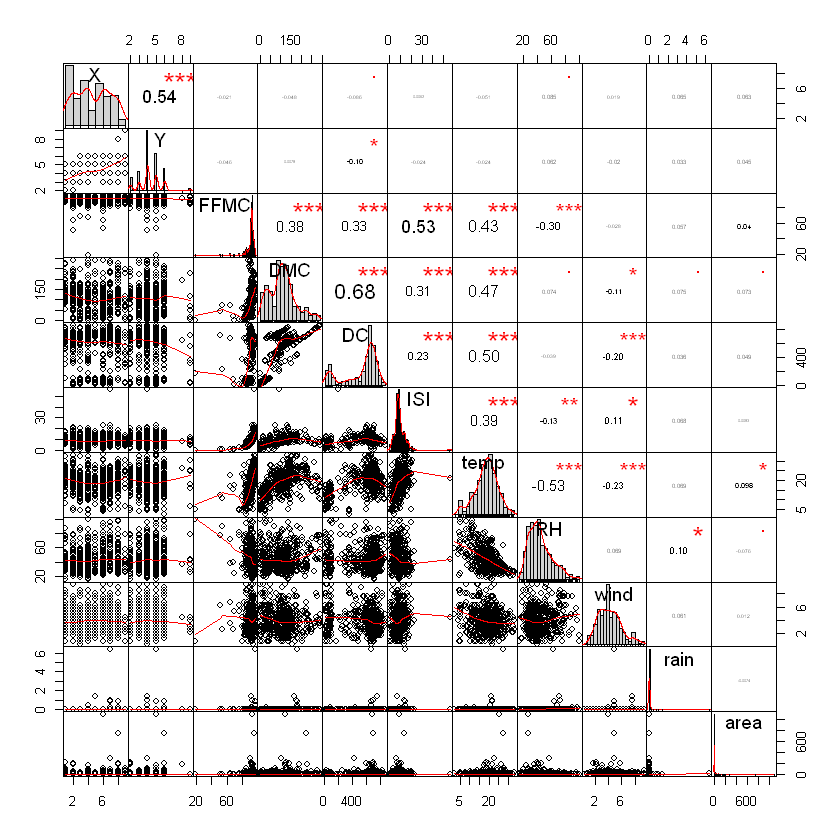

In [70]:
chart.Correlation(forestfires[-c(3,4)], histogram=TRUE, pch=25)

#### I would remove<font color='blue'> DMC, DC, RH </font>because they are correlated with 'temp' but 'temp' is proven to be a good predictor. Also I would remove X and Y because geographic coordinates shouldn't be the predictors by common logic.

In [71]:
# fit lda
lda4 = lda(area~FFMC+ISI+temp+wind+rain,data=train)

# predict test data target area
pred.lda4 = predict(lda4, newdata=test)

prediction.lda4 <- as.numeric(as.character(pred.lda4$class))
true.lda4 <- 0
false.lda4 <- 0
for (i in 1:length(test$area)){
    if (prediction.lda4[i] == test$area[i]){
        true.lda4 <- true.lda4+1
    } else {
        false.lda4 <- false.lda4+1
    }
}
cat('True prediction is:', true.lda4, 'and False prediction is: ', false.lda4)

True prediction is: 46 and False prediction is:  55

In [72]:
cat('Acuracy of LDA Model4 is: ',true.lda4/(true.lda4+false.lda4))

Acuracy of LDA Model4 is:  0.4554455

#### This new model has very similar performance with LDA model 3.

#### Let's run another LDA model with suggested predictors from fires article. Chosen predictors are <font color='blue'>'temp','wind','rain','RH'</font>

In [73]:
lda5 = lda(area~temp+wind+rain+RH,data=train)

# predict test data target area
pred.lda5 = predict(lda5, newdata=test)

prediction.lda5 <- as.numeric(as.character(pred.lda5$class))
true.lda5 <- 0
false.lda5 <- 0
for (i in 1:length(test$area)){
    if (prediction.lda5[i] == test$area[i]){
        true.lda5 <- true.lda5+1
    } else {
        false.lda5 <- false.lda5+1
    }
}
cat('True prediction is:', true.lda5, 'and False prediction is: ', false.lda5)

True prediction is: 47 and False prediction is:  54

In [74]:
cat('Acuracy of LDA Model5 is: ',true.lda5/(true.lda5+false.lda5))

Acuracy of LDA Model5 is:  0.4653465

#### LDA with forward selection chosen predictors without 'day'

In [75]:
lda6 = lda(area~X+temp,data=train)

# predict test data target area
pred.lda6 = predict(lda6, newdata=test)

prediction.lda6 <- as.numeric(as.character(pred.lda6$class))
true.lda6 <- 0
false.lda6 <- 0
for (i in 1:length(test$area)){
    if (prediction.lda6[i] == test$area[i]){
        true.lda6 <- true.lda6+1
    } else {
        false.lda6 <- false.lda6+1
    }
}
cat('True prediction is:', true.lda6, 'and False prediction is: ', false.lda6)

True prediction is: 48 and False prediction is:  53

In [76]:
cat('Acuracy of LDA Model5 is: ',true.lda6/(true.lda6+false.lda5))

Acuracy of LDA Model5 is:  0.4705882

#### In conclusion, LDA did work better without 'categorical data'. And from the models build, 'temp' is most important predictor. Follow by that, 'X' coordinate is also a good predictor. Follow by 'wind', 'rain', 'RH'. 

## SVM model

SVM can be used for regression problems although it is commonly used for classification

The three features <font color='orange'>forward</font> stepwise selected are <font color='red'>'X', 'day', 'temp'</font>

In [77]:
svm1 <- svm(as.factor(area)~X+day+temp, data=train)

In [78]:
summary(svm1)


Call:
svm(formula = as.factor(area) ~ X + day + temp, data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  396

 ( 179 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 )


Number of Classes:  205 

Levels: 
 0 0.09 0.17 0.21 0.24 0.33 0.36 0.41 0.52 0.54 0.55 0.61 0.68 0.71 0.72 0.75 0.77 0.79 0.9 0.95 0.96 1.01 1.07 1.09 1.1 1.12 1.19 1.26 1.29 1.36 1.43 1.46 1.47 1.52 1.56 1.58 1.63 1.64 1.69 1.75 1.76 1.9 1.94 1.95 2 2.01 2.03 2.07 2.13 2.14 2.17 2.21 2.35 2.44 2.47 2.53 2.55 2.64 2.74 2.77 2.87 2.93 3.05 3.07 3.09 3.19 3.2 3.32 3.33 3.35 3.63 3.64 3.71 3.

In [79]:
predict(svm1, newdata=test)

1   2   9  13  14  15  18  27  35  42  44  52  65  68  76  77  79  89  90  91 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 93  95  98  99 102 104 109 113 124 131 135 136 138 140 141 157 158 163 167 168 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
171 172 175 184 186 195 199 205 213 217 219 220 236 238 244 246 251 260 262 270 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
274 278 295 296 297 302 309 319 324 325 333 337 339 344 352 354 359 369 378 381 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
382 388 404 406 409 412 429 439 442 458 462 467 470 481 482 489 493 496 498 508 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
511 
  0 
205 Levels: 0 0.09 0.17 0.21 0.24 0.33 0.36 0.41 0.52 0.54 0.55 0.61 ... 1090.84

In [80]:
# predict test data target area
svm1.pred = predict(svm1, newdata=test)

prediction.svm1 <- as.numeric(as.character(svm1.pred))
true.svm1 <- 0
false.svm1 <- 0
for (i in 1:length(test$area)){
    if (prediction.svm1[i] == test$area[i]){
        true.svm1 <- true.svm1+1
    } else {
        false.svm1 <- false.svm1+1
    }
}
cat('True prediction is:', true.svm1, 'and False prediction is: ', false.svm1)

True prediction is: 48 and False prediction is:  53

In [81]:
cat('Acuracy of SVM Model 1 is: ',true.svm1/(true.svm1+false.svm1))

Acuracy of SVM Model 1 is:  0.4752475

#### Although the accuracy is as good as LDA, the predictions are all 0 and this is actually not as informative as LDA model.

#### This could be because of the ranges of predictors vary a lot. So, I would normalize the dataset and try SVM again

In [82]:
normalize <- function(x){
    return ((x-min(x))/(max(x)-min(x)))
}

In [83]:
norm_train <- train
norm_test <- test

In [84]:
names(train)

[1] "X"    "Y"    "day"  "FFMC" "DMC"  "DC"   "ISI"  "temp" "RH"   "wind"
[11] "rain" "area"

In [85]:
norm_train['X'] <- lapply(norm_train['X'], normalize)
norm_train['Y'] <- lapply(norm_train['Y'], normalize)
norm_train['FFMC'] <- lapply(norm_train['FFMC'], normalize)
norm_train['DMC'] <- lapply(norm_train['DMC'], normalize)
norm_train['DC'] <- lapply(norm_train['DC'], normalize)
norm_train['ISI'] <- lapply(norm_train['ISI'], normalize)
norm_train['temp'] <- lapply(norm_train['temp'], normalize)
norm_train['RH'] <- lapply(norm_train['RH'], normalize)
norm_train['wind'] <- lapply(norm_train['wind'], normalize)
norm_train['rain'] <- lapply(norm_train['rain'], normalize)
norm_train['area'] <- lapply(norm_train['area'], normalize)


In [86]:
norm_test['X'] <- lapply(norm_test['X'], normalize)
norm_test['Y'] <- lapply(norm_test['Y'], normalize)
norm_test['FFMC'] <- lapply(norm_test['FFMC'], normalize)
norm_test['DMC'] <- lapply(norm_test['DMC'], normalize)
norm_test['DC'] <- lapply(norm_test['DC'], normalize)
norm_test['ISI'] <- lapply(norm_test['ISI'], normalize)
norm_test['temp'] <- lapply(norm_test['temp'], normalize)
norm_test['RH'] <- lapply(norm_test['RH'], normalize)
norm_test['wind'] <- lapply(norm_test['wind'], normalize)
norm_test['rain'] <- lapply(norm_test['rain'], normalize)
norm_test['area'] <- lapply(norm_test['area'], normalize)

In [87]:
svm2 <- svm(as.factor(area)~X+temp, data=norm_train)

# predict test data target area
svm2.pred = predict(svm2, newdata=norm_test)

prediction.svm2 <- as.numeric(as.character(svm2.pred))
true.svm2 <- 0
false.svm2 <- 0
for (i in 1:length(norm_test$area)){
    if (prediction.svm2[i] == norm_test$area[i]){
        true.svm2 <- true.svm2+1
    } else {
        false.svm2 <- false.svm2+1
    }
}
cat('True prediction is:', true.svm2, 'and False prediction is: ', false.svm2)

True prediction is: 48 and False prediction is:  53

In [88]:
cat('Acuracy of SVM Model 2 is: ',true.svm2/(true.svm2+false.svm2))

Acuracy of SVM Model 2 is:  0.4752475

#### It turns out that svm doesn't change whether the dataset is normalized or not.

## In order to perform KNN, need  to remove 'day'.

In [89]:
train.knn <- norm_train[-3]
test.knn <- norm_test[-3]
train.target <- train.knn$area
test.target <- test.knn$area

In [90]:
set.seed(12)
knn1.pred <- knn(train=train.knn, test=test.knn, cl=train.target, k = 10)

In [91]:
table(test.target,knn1.pred)

                     knn1.pred
test.target            0 8.25052253309376e-05 0.000155843203402882
  0                   46                    0                    0
  0.00201991732431417  2                    0                    0
  0.00220781661029688  0                    0                    0
  0.00319428786170613  1                    0                    0
  0.00357008643367155  0                    0                    0
  0.00422773393461105  1                    0                    0
  0.00577790304396843  1                    0                    0
  0.00648252536640361  1                    0                    0
  0.00756294626080421  1                    0                    0
  0.00765689590379557  1                    0                    0
  0.00807966929725667  1                    0                    0
  0.00911311537016159  1                    0                    0
  0.0102405110860579   2                    0                    0
  0.0107572341225103   1       

In [92]:
prediction.knn1 <- as.numeric(as.character(knn1.pred))
true.knn1 <- 0
false.knn1 <- 0
for (i in 1:length(test.knn$area)){
    if (prediction.knn1[i] == test.knn$area[i]){
        true.knn1 <- true.knn1+1
    } else {
        false.knn1 <- false.knn1+1
    }
}
cat('True prediction is:', true.knn1, 'and False prediction is: ', false.knn1)

True prediction is: 46 and False prediction is:  55

In [93]:
cat('Acuracy of KNN Model 1 is: ',true.knn1/(true.knn1+false.knn1))

Acuracy of KNN Model 1 is:  0.4554455

#### KNN has similar performance as SVM but again, it's only predicting 0 and its not as fit as LDA model for this dataset.

#### Overall, the best predictors are 'temp', followed by 'X', 'wind', 'rain' 

#### Run Linear Regression Model again with normalized dataset to see if there is any improvement

In [94]:
fit.lm3 <- lm(area~X+temp,data=norm_train )
summary(fit.lm3)


Call:
lm(formula = area ~ X + temp, data = norm_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03527 -0.01469 -0.00802 -0.00053  0.97687 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.01711    0.01053  -1.624   0.1051  
X            0.01995    0.01067   1.870   0.0622 .
temp         0.03772    0.01620   2.328   0.0204 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06266 on 413 degrees of freedom
Multiple R-squared:  0.02054,	Adjusted R-squared:  0.01579 
F-statistic:  4.33 on 2 and 413 DF,  p-value: 0.01377


In [95]:
anova(fit.lm3, test = "Chisq")

Df  Sum Sq     Mean Sq    F value  Pr(>F)    
X           1 0.01272865 0.01272865 3.241698 0.07251572
temp        1 0.02127322 0.02127322 5.417803 0.02041482
Residuals 413 1.62166082 0.00392654       NA         NA

#### The R-squared value is still very low and thus indicating that this model isn't a good fit. But 'temp' has a good p-value which is smaller than 0.05. This confirms that 'temp' is a good predictor.

### Reference:
Replace a value in a data frame based on a conditional (`if`) statement
[https://stackoverflow.com/questions/5824173/replace-a-value-in-a-data-frame-based-on-a-conditional-if-statement]

Correlation matrix : A quick start guide to analyze, format and visualize a correlation matrix using R software
http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software

R Apply() function on specific dataframe columns https://stackoverflow.com/questions/18503177/r-apply-function-on-specific-dataframe-columns